In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
import scipy as scipy
import numpy as np
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
import time
import os
import nltk
nltk.download('wordnet')
import nltk
import re
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import sklearn.metrics
# print(os.listdir("../Documents"))
import warnings
from IPython.display import display
import matplotlib.pyplot as plt

import re
warnings.filterwarnings('ignore')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


<h1>Load and read dataset</h1>

In [ ]:
def read_dataset(path):
  return json.load(open(path))
train=read_dataset('/content/drive/My Drive/whats-cooking-kernels-only/train.json')
test=read_dataset('/content/drive/My Drive/whats-cooking-kernels-only/test.json')
train

<h1>Data Visualization</h1>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train =pd.read_json('/content/drive/My Drive/whats-cooking-kernels-only/train.json')
df_test=pd.read_json('/content/drive/My Drive/whats-cooking-kernels-only/test.json')
df_train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


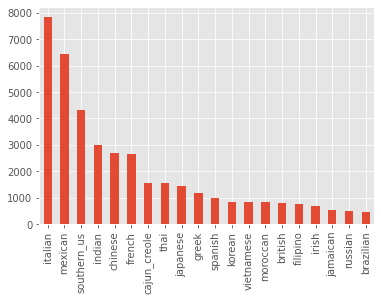

In [ ]:
plt.style.use('ggplot')
df_train['cuisine'].value_counts().plot(kind='bar')

 <h1>Most common ingredients for every cuisine:<h1>

In [ ]:
from collections import Counter
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [ ]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['Top{}'.format(i) for i in range(1, 11)])
top10

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


Top 10 ingredients should be highly specific for a certain cuisines.

In [ ]:
df_train['every_ingredients'] = df_train['ingredients'].map(";".join)
df_train.head()


,id,cuisine,ingredients,every_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


<h1>Plot for all the ingredients as per the cuisine<h1>

In [ ]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

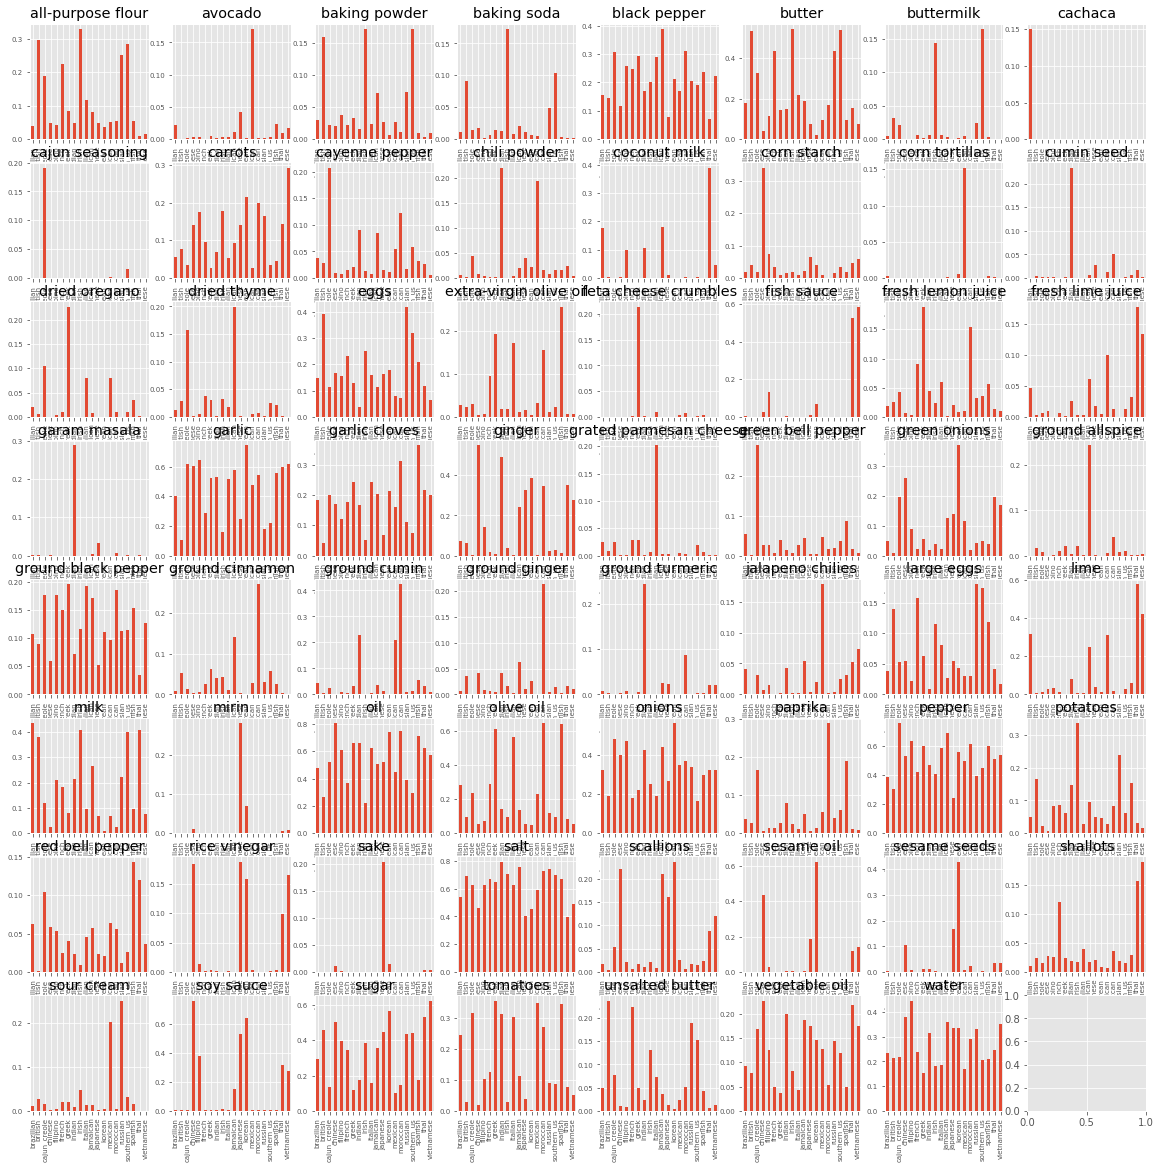

In [ ]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['every_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())                 #.value_counts() Return a Series containing counts of unique values.
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

# Preprocessing


In [ ]:
## convert multi-word ingredient into single word by substituting underscore on place of space
def sub_space(x):
    temp_value = list()
    for i in x:
        temp_value.append(re.sub(r'[^0-9a-zA-Z]+','_',i.lower()))
    return temp_value

df_train['ingredients_new'] = df_train['ingredients'].apply(sub_space)
df_test['ingredients_new'] = df_test['ingredients'].apply(sub_space)

## convert list of ingredients into a sentence
def convert_list_to_sent(x):
    return ' '.join(x)

df_train['ingredient_sent'] = df_train['ingredients_new'].apply(convert_list_to_sent)
df_test['ingredient_sent'] = df_test['ingredients_new'].apply(convert_list_to_sent)

display(df_train.head())
display(df_test.head())

,id,cuisine,ingredients,ingredients_new,ingredient_sent
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[romaine_lettuce, black_olives, grape_tomatoes...",romaine_lettuce black_olives grape_tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[plain_flour, ground_pepper, salt, tomatoes, g...",plain_flour ground_pepper salt tomatoes ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, cooking_oil, g...",eggs pepper salt mayonaise cooking_oil green_c...
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable_oil, wheat, salt]",water vegetable_oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[black_pepper, shallots, cornflour, cayenne_pe...",black_pepper shallots cornflour cayenne_pepper...


,id,ingredients,ingredients_new,ingredient_sent
0,18009,"[baking powder, eggs, all-purpose flour, raisi...","[baking_powder, eggs, all_purpose_flour, raisi...",baking_powder eggs all_purpose_flour raisins m...
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...","[sugar, egg_yolks, corn_starch, cream_of_tarta...",sugar egg_yolks corn_starch cream_of_tartar ba...
2,41580,"[sausage links, fennel bulb, fronds, olive oil...","[sausage_links, fennel_bulb, fronds, olive_oil...",sausage_links fennel_bulb fronds olive_oil cub...
3,29752,"[meat cuts, file powder, smoked sausage, okra,...","[meat_cuts, file_powder, smoked_sausage, okra,...",meat_cuts file_powder smoked_sausage okra shri...
4,35687,"[ground black pepper, salt, sausage casings, l...","[ground_black_pepper, salt, sausage_casings, l...",ground_black_pepper salt sausage_casings leeks...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Cleaning

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def text_prepare(ingredient):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    DOUBLE_SPACE_RE = re.compile('\s{2,}')
    STOPWORDS = set(stopwords.words('english'))
    # stop_words = set(stopwords.words('english')) 

    
    ingredient = ingredient.strip(" ")
    #lower casing letters
    ingredient = ingredient.lower()
    #replacing symbols by space
    ingredient = re.sub(REPLACE_BY_SPACE_RE,' ',ingredient)
    #deleting bad words
    ingredient = re.sub(BAD_SYMBOLS_RE,'',ingredient)
    #removing double space
    ingredient = re.sub(DOUBLE_SPACE_RE,'',ingredient)
    # remove numbers with percentages
    ingredient = re.sub('[0-9]*% ','',ingredient)
    # remove ounce information
    ingredient = re.sub("\(.*oz.\)",'',ingredient)
    # remove brand names with registered
    ingredient = re.sub("[A-Z]*[a-z]*®",'',ingredient)
    # remove brand names with trademark
    ingredient = re.sub("[A-Z]*[a-z]*™", '', ingredient)
    # remove numbers with +
    ingredient = re.sub("[0-9]+",'',ingredient)
    # replace & and -
    ingredient = ingredient.replace("&",'')
    ingredient = ingredient.replace("-", '')
    # lowercase all indegredients
    ingredient = ingredient.lower()
    # removing whitespacing once more
    ingredient = ingredient.strip()
    #removing stop words
    ingredient = ' '.join([word for word in ingredient.split(" ") if word not in STOPWORDS])
    
    return ingredient
def apply_text_prepare_to_list(ingredient_list):
    return ' '.join([text_prepare(ingredient) for ingredient in ingredient_list])
# df_train['ingredients']=df_train['ingredients'].apply(apply_text_prepare_to_list)
df_train

,id,cuisine,ingredients,ingredients_new,ingredient_sent
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[romaine_lettuce, black_olives, grape_tomatoes...",romaine_lettuce black_olives grape_tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[plain_flour, ground_pepper, salt, tomatoes, g...",plain_flour ground_pepper salt tomatoes ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, cooking_oil, g...",eggs pepper salt mayonaise cooking_oil green_c...
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable_oil, wheat, salt]",water vegetable_oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[black_pepper, shallots, cornflour, cayenne_pe...",black_pepper shallots cornflour cayenne_pepper...
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[light_brown_sugar, granulated_sugar, butter, ...",light_brown_sugar granulated_sugar butter warm...
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft_zesty_italian_dressing, purple_onion, b...",kraft_zesty_italian_dressing purple_onion broc...
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, citrus_fruit, raisins, sourdough_starte...",eggs citrus_fruit raisins sourdough_starter fl...
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[boneless_chicken_skinless_thigh, minced_garli...",boneless_chicken_skinless_thigh minced_garlic ...


In [ ]:
df_train

,id,cuisine,ingredients,every_ingredients,ingredients_new,ingredient_sent,lemmatized_ingredients_list
0,10259,greek,romaine lettuce black olives grape tomatoes ga...,romaine lettuce;black olives;grape tomatoes;ga...,"[romaine_lettuce, black_olives, grape_tomatoes...",romaine_lettuce black_olives grape_tomatoes ga...,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,plain flour ground pepper salt tomatoes ground...,plain flour;ground pepper;salt;tomatoes;ground...,"[plain_flour, ground_pepper, salt, tomatoes, g...",plain_flour ground_pepper salt tomatoes ground...,"[plain flour, ground pepper, salt, tomato, gro..."
2,20130,filipino,eggs pepper salt mayonaise cooking oil green c...,eggs;pepper;salt;mayonaise;cooking oil;green c...,"[eggs, pepper, salt, mayonaise, cooking_oil, g...",eggs pepper salt mayonaise cooking_oil green_c...,"[egg, pepper, salt, mayonaise, cooking oil, gr..."
3,22213,indian,water vegetable oil wheat salt,water;vegetable oil;wheat;salt,"[water, vegetable_oil, wheat, salt]",water vegetable_oil wheat salt,"[water, vegetable oil, wheat, salt]"
4,13162,indian,black pepper shallots cornflour cayenne pepper...,black pepper;shallots;cornflour;cayenne pepper...,"[black_pepper, shallots, cornflour, cayenne_pe...",black_pepper shallots cornflour cayenne_pepper...,"[black pepper, shallot, cornflour, cayenne pep..."
...,...,...,...,...,...,...,...
39769,29109,irish,light brown sugar granulated sugar butter warm...,light brown sugar;granulated sugar;butter;warm...,"[light_brown_sugar, granulated_sugar, butter, ...",light_brown_sugar granulated_sugar butter warm...,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,kraft zesty italian dressing purple onion broc...,KRAFT Zesty Italian Dressing;purple onion;broc...,"[kraft_zesty_italian_dressing, purple_onion, b...",kraft_zesty_italian_dressing purple_onion broc...,"[kraft zesty italian dressing, purple onion, b..."
39771,2238,irish,eggs citrus fruit raisins sourdough starter fl...,eggs;citrus fruit;raisins;sourdough starter;fl...,"[eggs, citrus_fruit, raisins, sourdough_starte...",eggs citrus_fruit raisins sourdough_starter fl...,"[egg, citrus fruit, raisin, sourdough starter,..."
39772,41882,chinese,boneless chicken skinless thigh minced garlic ...,boneless chicken skinless thigh;minced garlic;...,"[boneless_chicken_skinless_thigh, minced_garli...",boneless_chicken_skinless_thigh minced_garlic ...,"[boneless chicken skinless thigh, minced garli..."


# Lemmatization and stemming


In [ ]:
wnl = WordNetLemmatizer()
def lemmatize_each_row(x):
    y = []
    for each in x:
        y.append(wnl.lemmatize(each.lower()))
    return y

df_train['lemmatized_ingredients_list'] = df_train.apply(lambda row: lemmatize_each_row(row['ingredients']), axis=1)
all_ingredients_lemmatized = []
for ingredients_lists in df_train.ingredients:
    for ingredient in ingredients_lists:
        all_ingredients_lemmatized.append(wnl.lemmatize(ingredient.lower()))

all_ingredients_lemmatized = set(all_ingredients_lemmatized)
df_test['lemmatized_test_ingredients_list'] = df_test.apply(lambda row: lemmatize_each_row(row['ingredients']), axis=1)
all_ingredients_lemmatized_test = []
for ingredients_lists in df_test.ingredients:
    for ingredient in ingredients_lists:
        all_ingredients_lemmatized_test.append(wnl.lemmatize(ingredient.lower()))
all_ingredients_lemmatized_test = set(all_ingredients_lemmatized_test)

all_ingredients_union = all_ingredients_lemmatized | all_ingredients_lemmatized_test

In [ ]:
df_train

,id,cuisine,ingredients,ingredients_new,ingredient_sent,lemmatized_ingredients_list
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[romaine_lettuce, black_olives, grape_tomatoes...",romaine_lettuce black_olives grape_tomatoes ga...,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[plain_flour, ground_pepper, salt, tomatoes, g...",plain_flour ground_pepper salt tomatoes ground...,"[plain flour, ground pepper, salt, tomato, gro..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, cooking_oil, g...",eggs pepper salt mayonaise cooking_oil green_c...,"[egg, pepper, salt, mayonaise, cooking oil, gr..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable_oil, wheat, salt]",water vegetable_oil wheat salt,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[black_pepper, shallots, cornflour, cayenne_pe...",black_pepper shallots cornflour cayenne_pepper...,"[black pepper, shallot, cornflour, cayenne pep..."
...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[light_brown_sugar, granulated_sugar, butter, ...",light_brown_sugar granulated_sugar butter warm...,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft_zesty_italian_dressing, purple_onion, b...",kraft_zesty_italian_dressing purple_onion broc...,"[kraft zesty italian dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, citrus_fruit, raisins, sourdough_starte...",eggs citrus_fruit raisins sourdough_starter fl...,"[egg, citrus fruit, raisin, sourdough starter,..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[boneless_chicken_skinless_thigh, minced_garli...",boneless_chicken_skinless_thigh minced_garlic ...,"[boneless chicken skinless thigh, minced garli..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_train['every_ingredients'].values)              #learn new vocab from the document and then encode the same document
X.shape

(39774, 3010)

In [ ]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [ ]:
def generate_text(data):
    text_data = [" ".join(doc['ingredients']).lower() for doc in data]
    return text_data 

In [ ]:
train_text = generate_text(train)
test_text = generate_text(test)
target = [doc['cuisine'] for doc in train]
cuisines = set(target)


In [ ]:
vectorizer = CountVectorizer(analyzer = 'word',
                             binary = True, # Accounts for repetition within recipe
                             max_df = 0.99) # Any word appearing in more than 99% of the sample will be discarded


In [ ]:
tfidf = TfidfVectorizer(binary=True)
def tfidf_features(txt, flag):
    if flag == "train":
        x = tfidf.fit_transform(txt)
    else:
        x = tfidf.transform(txt)
    # x = x.astype('float16')
    return x 
X = tfidf_features(train_text, flag="train")
# X_test = tfidf_features(test_text, flag="test")
# print(X)
# print(X.toarray())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state = 0)

<h1>Logistic Regression</h1>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(C=10)
model_LR.fit(X_train , y_train)
print(model_LR.score(X_test, y_test))
y_predict_LR=model_LR.predict(X_test)


0.787711182622687


In [ ]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, y_predict_LR):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_df
# print(np.shape(y_test))

,chinese,thai,jamaican,cajun_creole,vietnamese,spanish,brazilian,irish,southern_us,indian,korean,french,italian,russian,mexican,filipino,moroccan,greek,japanese,british
chinese,66,0,3,1,3,2,0,4,1,7,0,0,0,18,0,0,7,6,2,0
thai,0,94,1,0,0,28,2,5,10,16,3,0,0,4,1,2,30,0,2,0
jamaican,1,5,257,1,0,17,0,2,1,9,0,0,0,4,0,0,60,5,0,0
cajun_creole,0,3,2,584,5,5,0,1,1,5,0,24,18,4,2,1,7,0,21,13
vietnamese,4,3,2,18,107,4,0,4,1,3,0,3,0,10,0,2,8,0,5,7
spanish,0,20,4,2,1,432,8,0,9,110,2,2,1,7,2,13,36,8,0,1
brazilian,0,2,0,0,1,15,208,4,0,48,0,0,0,6,5,1,5,7,0,0
irish,2,2,0,2,3,4,4,709,0,5,1,10,0,12,14,3,4,3,4,1
southern_us,1,15,0,1,0,19,0,1,86,8,0,0,0,2,2,2,21,1,0,0
indian,0,7,8,1,0,89,33,5,5,1691,0,3,0,19,5,5,43,16,2,0


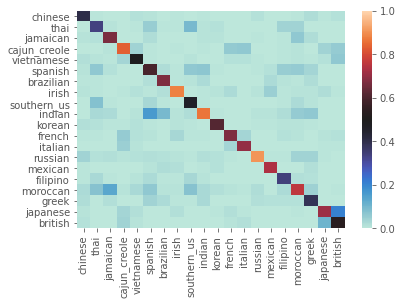

In [ ]:
summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [ ]:
print(classification_report(y_test,y_predict_LR))


              precision    recall  f1-score   support

           0       0.67      0.40      0.50       378
           1       0.48      0.34      0.40       645
           2       0.72      0.67      0.70      1249
           3       0.76      0.84      0.79      2134
           4       0.70      0.49      0.58       609
           5       0.55      0.60      0.57      2112
           6       0.74      0.67      0.70       931
           7       0.85      0.88      0.86      2422
           8       0.57      0.46      0.51       521
           9       0.78      0.86      0.82      6266
          10       0.86      0.62      0.72       424
          11       0.77      0.67      0.72      1134
          12       0.82      0.70      0.76       641
          13       0.89      0.91      0.90      5172
          14       0.84      0.74      0.79       653
          15       0.60      0.34      0.43       403
          16       0.66      0.76      0.71      3442
          17       0.54    

<h1>Naive Bayes classifier</h1>

In [ ]:
with open('/content/drive/My Drive/whats-cooking-kernels-only/train.json') as json_data:
    data = json.load(json_data)
    json_data.close()
classes = [item['cuisine'] for item in data]
ingredients = [item['ingredients'] for item in data]
unique_ingredients = set(item for sublist in ingredients for item in sublist)
unique_cuisines = set(classes)

big_data_matrix = scipy.sparse.dok_matrix((len(ingredients), len(unique_ingredients)), dtype=np.dtype(bool))

# print(big_data_matrix)

for d,dish in enumerate(ingredients):
    for i,ingredient in enumerate(unique_ingredients):
        if ingredient in dish:
            big_data_matrix[d,i] = True


In [ ]:

clf2 = BernoulliNB(alpha = 0, fit_prior = False)
f = clf2.fit(big_data_matrix, classes)
result = [(ref == res, ref, res) for (ref, res) in zip(classes, clf2.predict(big_data_matrix))]
accuracy_learn = sum (r[0] for r in result) / len(result)

print('Accuracy on the learning set: ', accuracy_learn)

Accuracy on the learning set:  0.8204606024035802


<h1>SVM(Linear Kernel)</h1>

In [ ]:
model_SVM_L = SVC(kernel = 'linear', random_state = 42, probability=True)
st = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 ,random_state = 0)

model_SVM_L.fit(X_train, y_train)
predictions_SVM = model_SVM_L.predict(X_test)
print('Accuracy: %0.4f [SVM Linear] [Time: %ss]' %(accuracy_score(y_test, predictions_SVM), (time.time()-st)))

Accuracy: 0.7923 [SVM Linear] [Time: 642.4495704174042s]


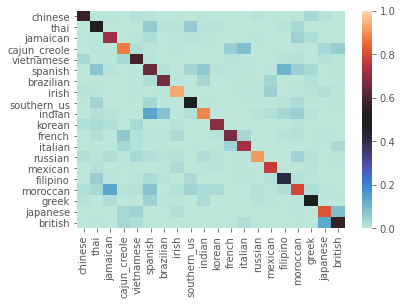

In [ ]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, predictions_SVM):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [ ]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68       107
           1       0.62      0.49      0.55       166
           2       0.74      0.71      0.73       270
           3       0.80      0.88      0.84       561
           4       0.71      0.59      0.64       140
           5       0.58      0.65      0.61       523
           6       0.84      0.66      0.74       246
           7       0.86      0.94      0.90       637
           8       0.73      0.50      0.59       121
           9       0.80      0.89      0.84      1551
          10       0.91      0.69      0.79       122
          11       0.85      0.67      0.75       275
          12       0.81      0.72      0.76       145
          13       0.92      0.92      0.92      1317
          14       0.85      0.77      0.81       161
          15       0.67      0.41      0.51        92
          16       0.71      0.79      0.75       852
          17       0.75    

<h1>Random Forest Classifier</h1>

In [ ]:
model_RF = RandomForestClassifier(n_estimators = 600, random_state = 42)
st = time.time()
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)
print('Accuracy: %0.4f [Random Forest] [Time: %ss]' %(accuracy_score(y_test, predictions_RF), (time.time()-st)))

Accuracy: 0.7563 [Random Forest] [Time: 360.4107666015625s]


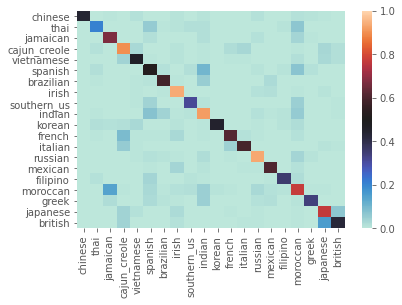

In [ ]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, predictions_RF):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [ ]:
print(classification_report(y_test,predictions_RF))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61       107
           1       0.73      0.21      0.33       166
           2       0.77      0.67      0.72       270
           3       0.75      0.90      0.82       561
           4       0.78      0.46      0.58       140
           5       0.61      0.52      0.56       523
           6       0.87      0.59      0.70       246
           7       0.83      0.94      0.88       637
           8       0.83      0.31      0.46       121
           9       0.71      0.92      0.80      1551
          10       0.98      0.45      0.62       122
          11       0.85      0.61      0.71       275
          12       0.90      0.59      0.71       145
          13       0.86      0.94      0.89      1317
          14       0.88      0.61      0.72       161
          15       0.87      0.36      0.51        92
          16       0.63      0.77      0.69       852
          17       0.88    

<h1>Ensemble Classifier</h1>

In [ ]:
eclf = VotingClassifier(estimators = [('model_LR',model_LR ),
                                        ('model_SVM', model_SVM_L),
                                        ('model_RF', model_RF)],
                                        voting = 'soft', weights = [1,1,1])
st = time.time()
eclf.fit(X_train, y_train)
predictions = eclf.predict(X_test)
print('Accuracy: %0.4f [Ensemble] [Time: %ss]' %(accuracy_score(y_test, predictions), (time.time()-st)))


Accuracy: 0.8049 [Ensemble] [Time: 1018.2981064319611s]


In [ ]:
# from sklearn.metrics import precision_score

# print('Precision:%0.4f [Ensemble]' %(precision_score(y_test,predictions)))


In [ ]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, predictions):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_df

,chinese,thai,jamaican,cajun_creole,vietnamese,spanish,brazilian,irish,southern_us,indian,korean,french,italian,russian,mexican,filipino,moroccan,greek,japanese,british
chinese,61,1,1,1,3,2,0,3,0,7,0,0,0,13,0,0,6,5,4,0
thai,0,84,0,0,0,25,1,5,8,13,2,0,0,1,0,2,24,0,1,0
jamaican,0,1,194,0,1,10,0,4,1,10,0,0,0,5,0,0,39,5,0,0
cajun_creole,0,1,0,488,3,2,0,2,0,6,0,16,13,4,1,0,5,0,10,10
vietnamese,2,0,1,13,89,3,0,3,0,4,0,4,0,5,0,1,10,0,4,1
spanish,0,10,2,2,1,336,3,0,5,96,2,2,1,5,1,10,40,6,0,1
brazilian,0,2,0,0,1,8,171,2,0,46,0,0,0,4,4,0,3,5,0,0
irish,1,1,0,1,1,1,1,601,0,3,1,1,0,9,6,2,2,2,3,1
southern_us,0,6,0,1,0,15,0,2,61,8,0,0,0,1,0,1,24,1,0,1
indian,0,2,3,1,0,56,21,3,3,1395,0,2,0,12,3,3,41,5,1,0


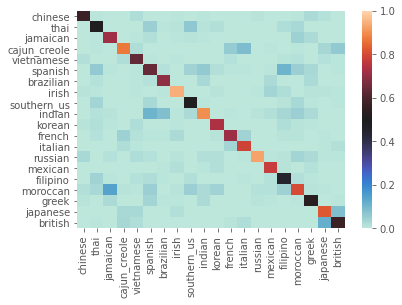

In [ ]:
summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.57      0.69       107
           1       0.67      0.51      0.58       166
           2       0.75      0.72      0.74       270
           3       0.83      0.87      0.85       561
           4       0.75      0.64      0.69       140
           5       0.64      0.64      0.64       523
           6       0.85      0.70      0.77       246
           7       0.87      0.94      0.91       637
           8       0.71      0.50      0.59       121
           9       0.81      0.90      0.85      1551
          10       0.86      0.74      0.79       122
          11       0.82      0.71      0.76       275
          12       0.82      0.79      0.80       145
          13       0.92      0.93      0.92      1317
          14       0.86      0.78      0.81       161
          15       0.59      0.45      0.51        92
          16       0.72      0.80      0.76       852
          17       0.72    

<h1>Comparison</h1>

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    <th>Precision</th>
      <th>Recall</th>
      <th>F1-Score</th>
  </tr>
  <!-- <tr>
    <td>ANN</td>
    <td>80.12%</td>
    <td>79%</td>
    <td>71%</td>
    <td>73%</td>
  </tr> -->
  <tr>
<!--       
<td>SVM(RBF Kernel)</td>
    <td>82%</td>
    <td>80%</td>
    <td>73%</td>
    <td>76%</td>
    </tr>-->
    <tr>
    <td>Logistic Regression</td>
    <td>79.41%</td>
    <td>76%</td>
    <td>69%</td>
    <td>72%</td>
  </tr> 
  

  <tr>
    <td>SVM(Linear)</td>
    <td>79.05%</td>
    <td>77%</td>
    <td>68%</td>
    <td>72%</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>75.2%</td>
    <td>82%</td>
    <td>58%</td>
    <td>65%</td>
  </tr>
  <tr>
    <td>Ensemble</td>
    <td>80.6%</td>
    <td>79%</td>
    <td>70%</td>
    <td>74%</td>
  </tr>
</table>
